In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [10]:
#img = cv2.imread('EPSG32756_Date20230501_Lat-33.775352_Lon151.122043_Mpp1.194.jpg')
#img = cv2.imread('train2_EPSG32756_Date20231207_Lat-33.798536_Lon151.193163_Mpp1.194.jpg')
#img = cv2.imread('train3_EPSG32756_Date20240121_Lat-33.792987_Lon151.093896_Mpp1.194.jpg')
#img = cv2.imread('val_EPSG32756_Date20231207_Lat-33.832977_Lon151.226638_Mpp1.194.jpg')
#img = cv2.imread('train4_EPSG32756_Date20240119_Lat-33.865692_Lon150.912994_Mpp1.194.jpg')
#img = cv2.imread('train5_EPSG32756_Date20231207_Lat-33.897393_Lon151.237785_Mpp1.194.jpg')
img = cv2.imread('train6_EPSG32756_Date20231207_Lat-33.941771_Lon151.020421_Mpp1.194.jpg')

In [11]:
# Coordinates of the top left pixel:
x_coordinate = 322400.236553
y_coordinate = 6263966.897408
#x_coordinate = 328486.488508
#y_coordinate = 6261763.916499
#x_coordinate = 317276.604548
#y_coordinate = 6263655.169279
#x_coordinate = 332532.796037
#y_coordinate = 6257366.243897
#x_coordinate = 301444.072312
#y_coordinate = 6254469.833498
#x_coordinate = 330570.911465
#y_coordinate = 6252163.089908
x_coordinate = 309989.482565
y_coordinate = 6247267.976327

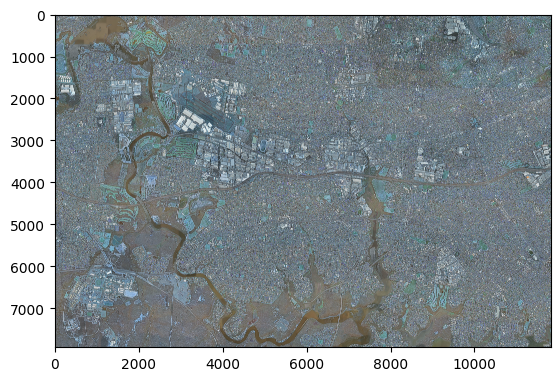

In [12]:
plt.imshow(img)
plt.show()

In [13]:
np.shape(img)[:2]

(7930, 11821)

In [14]:
new_shape = np.array((img.shape[1]*1.194329//(10/3), img.shape[0]*1.194329//(10/3)), dtype=int)

In [15]:
new_shape

array([4235, 2841])

In [16]:
rescaled_hr = cv2.resize(img, dsize=new_shape, interpolation=cv2.INTER_CUBIC)

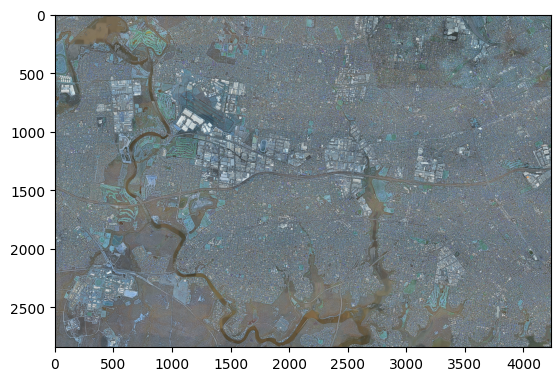

In [17]:
plt.imshow(rescaled_hr)
plt.show()

In [18]:
np.shape(rescaled_hr)

(2841, 4235, 3)

In [19]:
size_x = rescaled_hr.shape[1]//3
size_y = rescaled_hr.shape[0]//3
print(size_y)
print(size_x)

947
1411


# Also get the coordinates for the low-res Sentinel images

In [2]:
import rasterio
from rasterio.crs import CRS
from rasterio import warp
from rasterio.windows import Window
from pyproj import Proj
from math import floor, ceil

In [3]:
img_date = "S2B_20231012"
path_B02 = "../../../Sentinel images/MQ/"+img_date+"/GRANULE/L2A/IMG_DATA/R10m/B02_10m.jp2"
path_B03 = "../../../Sentinel images/MQ/"+img_date+"/GRANULE/L2A/IMG_DATA/R10m/B03_10m.jp2"
path_B04 = "../../../Sentinel images/MQ/"+img_date+"/GRANULE/L2A/IMG_DATA/R10m/B04_10m.jp2"

In [4]:
with rasterio.open(path_B02) as src:
    # Get metadata
    metadata = src.meta

    # Accessing metadata to get geospatial information
    print("Image Width:", metadata['width'])
    print("Image Height:", metadata['height'])
    print("Image CRS (Coordinate Reference System):", metadata['crs'])
    print("Image Transform (Affine matrix for georeferencing):", metadata['transform'])

Image Width: 10980
Image Height: 10980
Image CRS (Coordinate Reference System): EPSG:32756
Image Transform (Affine matrix for georeferencing): | 10.00, 0.00, 300000.00|
| 0.00,-10.00, 6300040.00|
| 0.00, 0.00, 1.00|


In [5]:
x_coordinate = 309989.482565
y_coordinate = 6247267.976327

In [6]:
# Replace these with the pixel coordinates you're interested in
#pixel_x = 2240
#pixel_y = 3607
#pixel_x = 2848
#pixel_y = 3828
#pixel_x = 1727
#pixel_y = 3639
#pixel_x = 3253
#pixel_y = 4268
pixel_x = 999
pixel_y = 5277

# Transform pixel coordinates to GPS coordinates
lon, lat = src.transform * (pixel_x, pixel_y)
print("GPS Coordinates (Longitude, Latitude):", lon, lat)

GPS Coordinates (Longitude, Latitude): 309990.0 6247270.0


In [7]:
with rasterio.open(path_B02) as src:
    arr_B02 = src.read(1)
    
with rasterio.open(path_B03) as src:
    arr_B03 = src.read(1)
    
with rasterio.open(path_B04) as src:
    arr_B04 = src.read(1)

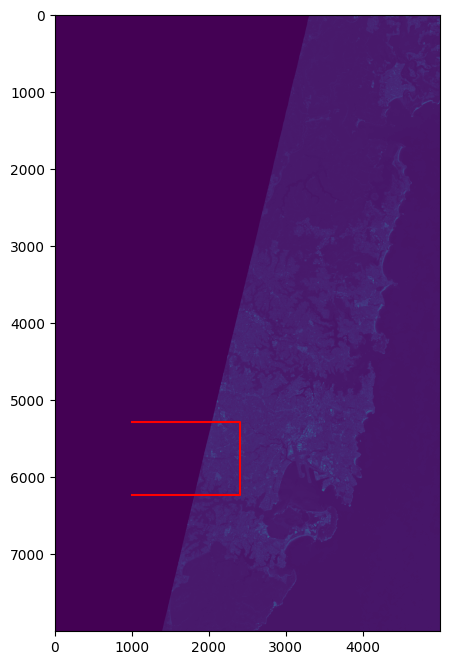

In [26]:
plt.figure(figsize=(8,8))
plt.imshow(arr_B03[:8000,:5000])
plt.plot([pixel_x, pixel_x+size_x, pixel_x+size_x, pixel_x],
         [pixel_y, pixel_y, pixel_y+size_y, pixel_y+size_y], 'r')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


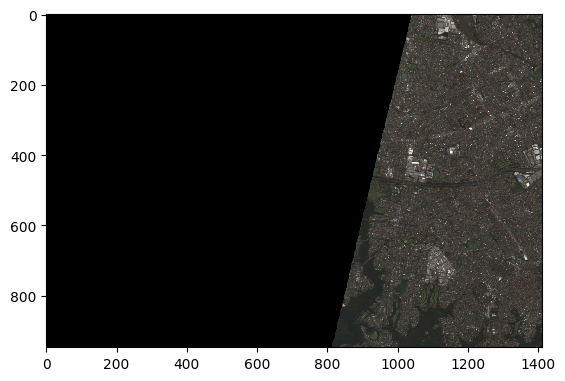

In [33]:
plt.imshow(np.dstack([arr_B04[pixel_y:pixel_y+size_y,pixel_x:pixel_x+size_x]/8000, 
                      arr_B03[pixel_y:pixel_y+size_y,pixel_x:pixel_x+size_x]/8000, 
                      arr_B02[pixel_y:pixel_y+size_y,pixel_x:pixel_x+size_x]/8000]), interpolation='None')
plt.show()

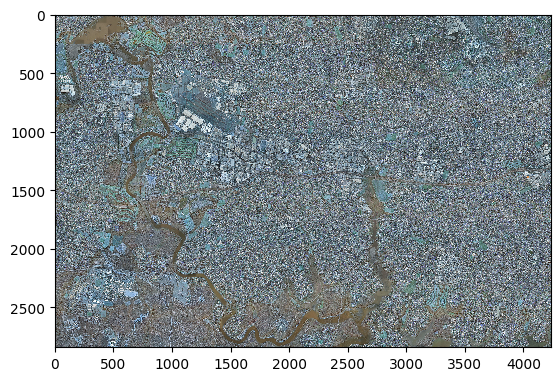

In [34]:
plt.imshow(rescaled_hr, interpolation='None')
plt.show()

# Split the image into 128x128 squares

### Defining the x_min, y_min and steps for each image

In [43]:
x_min_lr = pixel_x+1000
x_min_hr = 1000*3
y_min_lr = pixel_y+20
y_min_hr = 20*3
step_lr = 128
step_hr = 128*3

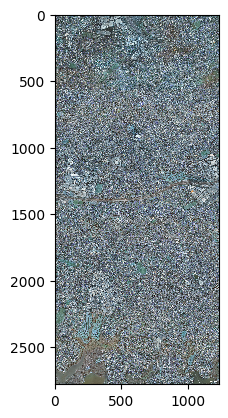

In [44]:
plt.imshow(rescaled_hr[y_min_hr:,x_min_hr:], interpolation='None')
plt.show()

In [45]:
subimage_test_lr = np.dstack([arr_B04[y_min_lr+step_lr*1:y_min_lr+step_lr*2,x_min_lr+step_lr*1:x_min_lr+step_lr*2]/10000,
                              arr_B03[y_min_lr+step_lr*1:y_min_lr+step_lr*2,x_min_lr+step_lr*1:x_min_lr+step_lr*2]/10000,
                              arr_B02[y_min_lr+step_lr*1:y_min_lr+step_lr*2,x_min_lr+step_lr*1:x_min_lr+step_lr*2]/10000])
subimage_test_hr = rescaled_hr[y_min_hr+step_hr*1:y_min_hr+step_hr*2,x_min_hr+step_hr*1:x_min_hr+step_hr*2]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


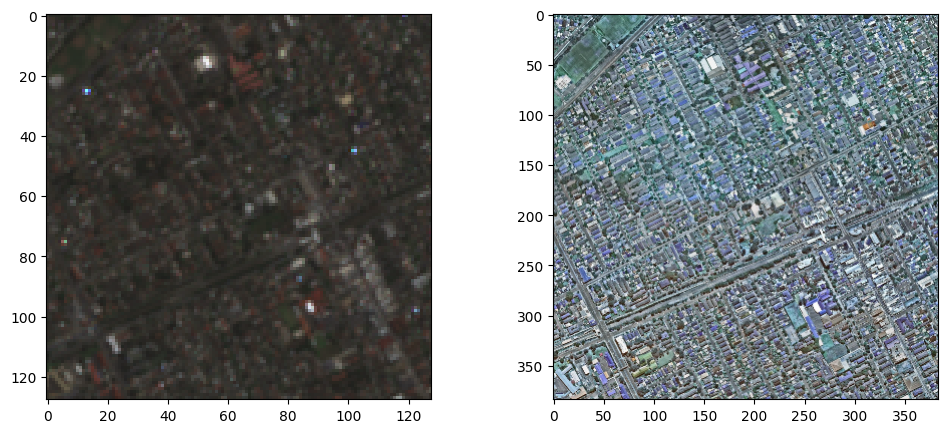

In [46]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].imshow(subimage_test_lr)
ax[1].imshow(subimage_test_hr)
plt.show()

### Importation of the HR image

In [47]:
shape_1, shape_2, _ = np.shape(rescaled_hr[y_min_hr:,x_min_hr:])
print(shape_1,shape_2)

2781 1235


In [48]:
shape_1//step_hr

7

In [49]:
shape_2//step_hr

3

In [50]:
#creation of the HR
index_count = 88
#index_count = 0
for y_i in range(7):
    for x_i in range(3):
        blue_hr = rescaled_hr[y_min_hr+step_hr*y_i:y_min_hr+step_hr*(y_i+1),x_min_hr+step_hr*x_i:x_min_hr+step_hr*(x_i+1),2]
        green_hr = rescaled_hr[y_min_hr+step_hr*y_i:y_min_hr+step_hr*(y_i+1),x_min_hr+step_hr*x_i:x_min_hr+step_hr*(x_i+1),1]
        red_hr = rescaled_hr[y_min_hr+step_hr*y_i:y_min_hr+step_hr*(y_i+1),x_min_hr+step_hr*x_i:x_min_hr+step_hr*(x_i+1),0]
        
        img_blue = Image.fromarray(blue_hr)
        img_green = Image.fromarray(green_hr)
        img_red = Image.fromarray(red_hr)
        
        if index_count<10:
            output_dir_blue = '../mq_3/train/BLUE/imgset0'+str(index_count)
            output_dir_green = '../mq_3/train/GREEN/imgset0'+str(index_count)
            output_dir_red = '../mq_3/train/RED/imgset0'+str(index_count)
        else:
            output_dir_blue = '../mq_3/train/BLUE/imgset'+str(index_count)
            output_dir_green = '../mq_3/train/GREEN/imgset'+str(index_count)
            output_dir_red = '../mq_3/train/RED/imgset'+str(index_count)
        
        if not os.path.isdir(output_dir_blue):
            os.mkdir(output_dir_blue)
        if not os.path.isdir(output_dir_green):
            os.mkdir(output_dir_green)
        if not os.path.isdir(output_dir_red):
            os.mkdir(output_dir_red)
            
        img_blue.save(output_dir_blue+'/HR.png')
        img_green.save(output_dir_green+'/HR.png')
        img_red.save(output_dir_red+'/HR.png')
        
        index_count+=1

In [ ]:
# macquarie uni is in imgset06

### Importation of the LR images

In [51]:
list_dates = ['S2A_20230524', 'S2A_20230609', 'S2A_20230619', 'S2A_20230623', 'S2A_20230629', 'S2A_20230713', 'S2A_20230729', 'S2A_20230812', 'S2A_20230818', 'S2A_20230917', 'S2A_20230921', 'S2A_20231031', 'S2B_20230519', 'S2B_20230529', 'S2B_20230614', 'S2B_20230618', 'S2B_20230624', 'S2B_20230708', 'S2B_20230817', 'S2B_20230827', 'S2B_20230906', 'S2B_20230912', 'S2B_20230916', 'S2B_20231002', 'S2B_20231012']

In [52]:
for i in range(len(list_dates)):
    img_date=list_dates[i]
    path_B02 = "../../../Sentinel images/MQ/"+img_date+"/GRANULE/L2A/IMG_DATA/R10m/B02_10m.jp2"
    path_B03 = "../../../Sentinel images/MQ/"+img_date+"/GRANULE/L2A/IMG_DATA/R10m/B03_10m.jp2"
    path_B04 = "../../../Sentinel images/MQ/"+img_date+"/GRANULE/L2A/IMG_DATA/R10m/B04_10m.jp2"
    
    with rasterio.open(path_B02) as src:
        arr_B02 = src.read(1)
    
    with rasterio.open(path_B03) as src:
        arr_B03 = src.read(1)

    with rasterio.open(path_B04) as src:
        arr_B04 = src.read(1)
        
    index_count = 88
    for y_i in range(7):
        for x_i in range(3):
            blue_lr = arr_B02[y_min_lr+step_lr*y_i:y_min_lr+step_lr*(y_i+1),x_min_lr+step_lr*x_i:x_min_lr+step_lr*(x_i+1)]
            green_lr = arr_B03[y_min_lr+step_lr*y_i:y_min_lr+step_lr*(y_i+1),x_min_lr+step_lr*x_i:x_min_lr+step_lr*(x_i+1)]
            red_lr = arr_B04[y_min_lr+step_lr*y_i:y_min_lr+step_lr*(y_i+1),x_min_lr+step_lr*x_i:x_min_lr+step_lr*(x_i+1)]
            
            img_blue = Image.fromarray(blue_lr)
            img_green = Image.fromarray(green_lr)
            img_red = Image.fromarray(red_lr)
        
            if index_count<10:
                output_dir_blue = '../mq_3/train/BLUE/imgset0'+str(index_count)
                output_dir_green = '../mq_3/train/GREEN/imgset0'+str(index_count)
                output_dir_red = '../mq_3/train/RED/imgset0'+str(index_count)
            else:
                output_dir_blue = '../mq_3/train/BLUE/imgset'+str(index_count)
                output_dir_green = '../mq_3/train/GREEN/imgset'+str(index_count)
                output_dir_red = '../mq_3/train/RED/imgset'+str(index_count)
            
            if i<10:
                img_blue.save(output_dir_blue+'/LR00'+str(i)+'.png')
                img_green.save(output_dir_green+'/LR00'+str(i)+'.png')
                img_red.save(output_dir_red+'/LR00'+str(i)+'.png')
            else:
                img_blue.save(output_dir_blue+'/LR0'+str(i)+'.png')
                img_green.save(output_dir_green+'/LR0'+str(i)+'.png')
                img_red.save(output_dir_red+'/LR0'+str(i)+'.png')
                
            index_count+=1

## Copying and saving the SM.png image

In [53]:
from matplotlib.image import imread

In [54]:
sm_image = imread('../mq_3/train/BLUE/imgset01/SM.png')

In [55]:
img_sm = Image.fromarray(255*np.ones((384,384), dtype=np.uint8))

In [56]:
#creation of the HR
#index_count = 30
index_count = 88
for y_i in range(7):
    for x_i in range(3):
        
        if index_count<10:
            output_dir_blue = '../mq_3/train/BLUE/imgset0'+str(index_count)
            output_dir_green = '../mq_3/train/GREEN/imgset0'+str(index_count)
            output_dir_red = '../mq_3/train/RED/imgset0'+str(index_count)
        else:
            output_dir_blue = '../mq_3/train/BLUE/imgset'+str(index_count)
            output_dir_green = '../mq_3/train/GREEN/imgset'+str(index_count)
            output_dir_red = '../mq_3/train/RED/imgset'+str(index_count)
            
        img_sm.save(output_dir_blue+'/SM.png')
        img_sm.save(output_dir_green+'/SM.png')
        img_sm.save(output_dir_red+'/SM.png')
        
        index_count+=1

In [36]:
sm_image_test = imread('../mq_3/train/BLUE/imgset19/SM.png')